<a href="https://colab.research.google.com/github/Eezzeldin/candy/blob/main/Interdependency_Candy_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import ClassifierChain
from sklearn.metrics import make_scorer, balanced_accuracy_score


from sklearn.model_selection import RandomizedSearchCV, LeaveOneOut  , StratifiedKFold , cross_val_score
from scipy.stats import uniform , randint

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [ ]:
data = pd.read_csv ("/content/candy-data.csv")
data

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [ ]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [ ]:
data.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [ ]:
c1 = data ['chocolate'] == 0
c2 = data ['fruity'] == 0
c  = c1 & c2

data ["other_candy"] = np.where (c , 1 , 0)

In [ ]:
data ["winpercent"] = data ["winpercent"] / 100

In [ ]:
decision_cols = ['chocolate', 'fruity', 'other_candy' ,'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']
cont_cols     = ['sugarpercent','winpercent' ,'pricepercent' ]

array([[<Axes: title={'center': 'chocolate'}>,
        <Axes: title={'center': 'fruity'}>,
        <Axes: title={'center': 'other_candy'}>],
       [<Axes: title={'center': 'caramel'}>,
        <Axes: title={'center': 'peanutyalmondy'}>,
        <Axes: title={'center': 'nougat'}>],
       [<Axes: title={'center': 'crispedricewafer'}>,
        <Axes: title={'center': 'hard'}>,
        <Axes: title={'center': 'bar'}>],
       [<Axes: title={'center': 'pluribus'}>, <Axes: >, <Axes: >]],
      dtype=object)

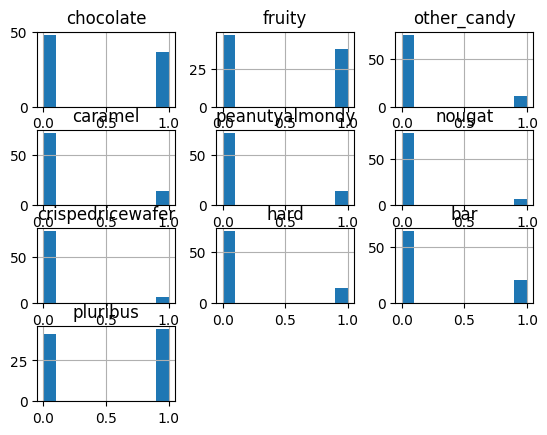

In [ ]:
data [decision_cols].hist ()

In [ ]:
data [decision_cols].nunique ()

chocolate           2
fruity              2
other_candy         2
caramel             2
peanutyalmondy      2
nougat              2
crispedricewafer    2
hard                2
bar                 2
pluribus            2
dtype: int64

In [ ]:
data [decision_cols].corr ()

,chocolate,fruity,other_candy,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
chocolate,1.000000,-0.741721,-0.338502,0.249875,0.377824,0.254892,0.341210,-0.344177,0.597421,-0.339675
fruity,-0.741721,1.000000,-0.346676,-0.335485,-0.399280,-0.269367,-0.269367,0.390678,-0.515066,0.299725
other_candy,-0.338502,-0.346676,1.000000,0.112284,0.017787,0.012000,-0.115500,0.005408,-0.139586,0.021456
caramel,0.249875,-0.335485,0.112284,1.000000,0.059356,0.328493,0.213113,-0.122355,0.333960,-0.269585
peanutyalmondy,0.377824,-0.399280,0.017787,0.059356,1.000000,0.213113,-0.017646,-0.205557,0.260420,-0.206109
nougat,0.254892,-0.269367,0.012000,0.328493,0.213113,1.000000,-0.089744,-0.138675,0.522976,-0.310339
crispedricewafer,0.341210,-0.269367,-0.115500,0.213113,-0.017646,-0.089744,1.000000,-0.138675,0.423751,-0.224693
hard,-0.344177,0.390678,0.005408,-0.122355,-0.205557,-0.138675,-0.138675,1.000000,-0.265165,0.014532
bar,0.597421,-0.515066,-0.139586,0.333960,0.260420,0.522976,0.423751,-0.265165,1.000000,-0.593409
pluribus,-0.339675,0.299725,0.021456,-0.269585,-0.206109,-0.310339,-0.224693,0.014532,-0.593409,1.000000


In [ ]:
data [decision_cols].corr () [['chocolate']].apply(lambda x : abs (x)).sort_values ("chocolate")

,chocolate
caramel,0.249875
nougat,0.254892
other_candy,0.338502
pluribus,0.339675
crispedricewafer,0.341210
hard,0.344177
peanutyalmondy,0.377824
bar,0.597421
fruity,0.741721
chocolate,1.000000


In [ ]:
#'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
#       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus'

ordered_decision_cols = data [decision_cols].corr () [['chocolate']].apply(lambda x : abs (x)).sort_values ("chocolate",ascending =False) .index.values
ordered_decision_cols

array(['chocolate', 'fruity', 'bar', 'peanutyalmondy', 'hard',
       'crispedricewafer', 'pluribus', 'other_candy', 'nougat', 'caramel'],
      dtype=object)

In [ ]:
reordered_decision_cols = ['chocolate', 'fruity' , 'other_candy' , 'bar', 'peanutyalmondy', 'hard',
       'crispedricewafer', 'pluribus',  'nougat', 'caramel']

In [ ]:
data [reordered_decision_cols]

,chocolate,fruity,other_candy,bar,peanutyalmondy,hard,crispedricewafer,pluribus,nougat,caramel
0,1,0,0,1,0,0,1,0,0,1
1,1,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0,0
81,0,1,0,0,0,1,0,0,0,0
82,0,1,0,0,0,0,0,1,0,0
83,0,0,1,0,0,1,0,0,0,1


In [ ]:
data [cont_cols]

,sugarpercent,winpercent,pricepercent
0,0.732,0.669717,0.860
1,0.604,0.676029,0.511
2,0.011,0.322611,0.116
3,0.011,0.461165,0.511
4,0.906,0.523415,0.511
...,...,...,...
80,0.220,0.454663,0.116
81,0.093,0.390119,0.116
82,0.313,0.443755,0.313
83,0.186,0.419043,0.267


In [ ]:
# Store models and their accuracies
models     = []
accuracies = []
feature_imp = []
feature_imp_dfs = []
for i in range(data [reordered_decision_cols].shape[1]):
    # Use the i-th column as the target, and all others as features
    X = np.delete(data [reordered_decision_cols], i, axis=1)
    y = data [reordered_decision_cols].iloc [:, i]

    # Initialize and train the RandomForest classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, y)

    # Store the model
    models.append(model)

    # Evaluate and store accuracy
    y_pred = model.predict(X)
    accuracy = balanced_accuracy_score (y, y_pred , adjusted=True)
    accuracies.append(accuracy)
    print(f"Model {i+1} (predicting variable {i+1}): Accuracy = {accuracy:.2f}" , reordered_decision_cols [i])

    feature_imp.append (model.feature_importances_)

    print ((data [reordered_decision_cols].drop (reordered_decision_cols [i] ,axis =1).columns))
    feature_imp_dfs.append ( pd.DataFrame ([feature_imp [i]] , columns = data [reordered_decision_cols].drop (reordered_decision_cols [i] ,axis =1).columns) )

Model 1 (predicting variable 1): Accuracy = 0.97 chocolate
Index(['fruity', 'other_candy', 'bar', 'peanutyalmondy', 'hard',
       'crispedricewafer', 'pluribus', 'nougat', 'caramel'],
      dtype='object')
Model 2 (predicting variable 2): Accuracy = 1.00 fruity
Index(['chocolate', 'other_candy', 'bar', 'peanutyalmondy', 'hard',
       'crispedricewafer', 'pluribus', 'nougat', 'caramel'],
      dtype='object')
Model 3 (predicting variable 3): Accuracy = 1.00 other_candy
Index(['chocolate', 'fruity', 'bar', 'peanutyalmondy', 'hard',
       'crispedricewafer', 'pluribus', 'nougat', 'caramel'],
      dtype='object')
Model 4 (predicting variable 4): Accuracy = 0.84 bar
Index(['chocolate', 'fruity', 'other_candy', 'peanutyalmondy', 'hard',
       'crispedricewafer', 'pluribus', 'nougat', 'caramel'],
      dtype='object')
Model 5 (predicting variable 5): Accuracy = 0.27 peanutyalmondy
Index(['chocolate', 'fruity', 'other_candy', 'bar', 'hard', 'crispedricewafer',
       'pluribus', 'nougat',

In [ ]:
feature_imp[1]

array([0.45066964, 0.24630903, 0.11190256, 0.05706137, 0.06004514,
       0.0053443 , 0.0165992 , 0.00628807, 0.04578068])

In [ ]:
decsion_df = pd.DataFrame (reordered_decision_cols)
decsion_df

,0
0,chocolate
1,fruity
2,other_candy
3,bar
4,peanutyalmondy
5,hard
6,crispedricewafer
7,pluribus
8,nougat
9,caramel


In [ ]:
feature_imp_dfs

[     fruity  other_candy       bar  peanutyalmondy      hard  \
 0  0.440885     0.238638  0.155794         0.04977  0.035924   
 
    crispedricewafer  pluribus   nougat   caramel  
 0          0.014632  0.033634  0.01093  0.019794  ,
    chocolate  other_candy       bar  peanutyalmondy      hard  \
 0    0.45067     0.246309  0.111903        0.057061  0.060045   
 
    crispedricewafer  pluribus    nougat   caramel  
 0          0.005344  0.016599  0.006288  0.045781  ,
    chocolate    fruity       bar  peanutyalmondy      hard  crispedricewafer  \
 0   0.459503  0.358468  0.029319        0.037395  0.024337          0.005462   
 
    pluribus    nougat   caramel  
 0  0.022663  0.011999  0.050853  ,
    chocolate    fruity  other_candy  peanutyalmondy      hard  \
 0    0.19716  0.112288     0.029041        0.056056  0.025493   
 
    crispedricewafer  pluribus    nougat   caramel  
 0          0.070581  0.328249  0.148535  0.032595  ,
    chocolate    fruity  other_candy       bar

In [ ]:
feature_imp_dfs [0]

,fruity,other_candy,bar,peanutyalmondy,hard,crispedricewafer,pluribus,nougat,caramel
0,0.440885,0.238638,0.155794,0.04977,0.035924,0.014632,0.033634,0.01093,0.019794


In [ ]:
feature_imp_dfs [1]

,chocolate,other_candy,bar,peanutyalmondy,hard,crispedricewafer,pluribus,nougat,caramel
0,0.45067,0.246309,0.111903,0.057061,0.060045,0.005344,0.016599,0.006288,0.045781


In [ ]:
imp_df = pd.concat (feature_imp_dfs)
imp_df

,fruity,other_candy,bar,peanutyalmondy,hard,crispedricewafer,pluribus,nougat,caramel,chocolate
0,0.440885,0.238638,0.155794,0.049770,0.035924,0.014632,0.033634,0.010930,0.019794,NaN
0,NaN,0.246309,0.111903,0.057061,0.060045,0.005344,0.016599,0.006288,0.045781,0.450670
0,0.358468,NaN,0.029319,0.037395,0.024337,0.005462,0.022663,0.011999,0.050853,0.459503
0,0.112288,0.029041,NaN,0.056056,0.025493,0.070581,0.328249,0.148535,0.032595,0.197160
0,0.169825,0.056058,0.131078,NaN,0.026864,0.095765,0.116523,0.121722,0.134123,0.148043
0,0.329435,0.053421,0.048221,0.040072,NaN,0.000691,0.178395,0.003601,0.107733,0.238431
0,0.046013,0.015362,0.221445,0.151869,0.002875,NaN,0.042659,0.260858,0.169054,0.089865
0,0.080873,0.035957,0.475241,0.068302,0.066090,0.018932,NaN,0.044231,0.099111,0.111263
0,0.022232,0.065926,0.269594,0.111551,0.003564,0.209836,0.056564,NaN,0.196139,0.064594
0,0.105659,0.086848,0.112568,0.139245,0.073982,0.118082,0.122589,0.175921,NaN,0.065107


In [ ]:
imp_df ["Decisions"] = reordered_decision_cols

In [ ]:
imp_df ["Accuracies"] = accuracies
imp_df

,fruity,other_candy,bar,peanutyalmondy,hard,crispedricewafer,pluribus,nougat,caramel,chocolate,Decisions,Accuracies
0,0.440885,0.238638,0.155794,0.049770,0.035924,0.014632,0.033634,0.010930,0.019794,NaN,chocolate,0.972973
0,NaN,0.246309,0.111903,0.057061,0.060045,0.005344,0.016599,0.006288,0.045781,0.450670,fruity,1.000000
0,0.358468,NaN,0.029319,0.037395,0.024337,0.005462,0.022663,0.011999,0.050853,0.459503,other_candy,1.000000
0,0.112288,0.029041,NaN,0.056056,0.025493,0.070581,0.328249,0.148535,0.032595,0.197160,bar,0.841518
0,0.169825,0.056058,0.131078,NaN,0.026864,0.095765,0.116523,0.121722,0.134123,0.148043,peanutyalmondy,0.271630
0,0.329435,0.053421,0.048221,0.040072,NaN,0.000691,0.178395,0.003601,0.107733,0.238431,hard,0.066667
0,0.046013,0.015362,0.221445,0.151869,0.002875,NaN,0.042659,0.260858,0.169054,0.089865,crispedricewafer,0.415751
0,0.080873,0.035957,0.475241,0.068302,0.066090,0.018932,NaN,0.044231,0.099111,0.111263,pluribus,0.592018
0,0.022232,0.065926,0.269594,0.111551,0.003564,0.209836,0.056564,NaN,0.196139,0.064594,nougat,0.701465
0,0.105659,0.086848,0.112568,0.139245,0.073982,0.118082,0.122589,0.175921,NaN,0.065107,caramel,0.400402


In [ ]:
imp_df = imp_df [reordered_decision_cols]
imp_df

,chocolate,fruity,other_candy,bar,peanutyalmondy,hard,crispedricewafer,pluribus,nougat,caramel
0,NaN,0.440885,0.238638,0.155794,0.049770,0.035924,0.014632,0.033634,0.010930,0.019794
0,0.450670,NaN,0.246309,0.111903,0.057061,0.060045,0.005344,0.016599,0.006288,0.045781
0,0.459503,0.358468,NaN,0.029319,0.037395,0.024337,0.005462,0.022663,0.011999,0.050853
0,0.197160,0.112288,0.029041,NaN,0.056056,0.025493,0.070581,0.328249,0.148535,0.032595
0,0.148043,0.169825,0.056058,0.131078,NaN,0.026864,0.095765,0.116523,0.121722,0.134123
0,0.238431,0.329435,0.053421,0.048221,0.040072,NaN,0.000691,0.178395,0.003601,0.107733
0,0.089865,0.046013,0.015362,0.221445,0.151869,0.002875,NaN,0.042659,0.260858,0.169054
0,0.111263,0.080873,0.035957,0.475241,0.068302,0.066090,0.018932,NaN,0.044231,0.099111
0,0.064594,0.022232,0.065926,0.269594,0.111551,0.003564,0.209836,0.056564,NaN,0.196139
0,0.065107,0.105659,0.086848,0.112568,0.139245,0.073982,0.118082,0.122589,0.175921,NaN


In [ ]:
( 0.440885 + 0.238638 ) /2

0.3397615

In [ ]:
np.mean (imp_df [reordered_decision_cols].iloc [:,:3] , axis= 1)

0    0.339762
0    0.348489
0    0.408986
0    0.112830
0    0.124642
0    0.207096
0    0.050413
0    0.076031
0    0.050917
0    0.085871
dtype: float64

In [ ]:
np.mean (imp_df [reordered_decision_cols].iloc [:,3:] , axis= 0)

bar                 0.172796
peanutyalmondy      0.079036
hard                0.035464
crispedricewafer    0.059925
pluribus            0.101986
nougat              0.087120
caramel             0.095020
dtype: float64

In [ ]:
imp_df ["main_cols_mean"] = np.mean (imp_df [reordered_decision_cols].iloc [:,:3] , axis= 1)
imp_df ["other_cols_mean"] = np.mean (imp_df [reordered_decision_cols].iloc [:,3:] , axis= 1)
imp_df ["ratio"]          = imp_df ["main_cols_mean"] / imp_df ["other_cols_mean"]
imp_df ["Accuracies"] = accuracies
imp_df ["Decisions"] = reordered_decision_cols
imp_df.sort_values ("Accuracies")

,chocolate,fruity,other_candy,bar,peanutyalmondy,hard,crispedricewafer,pluribus,nougat,caramel,main_cols_mean,other_cols_mean,ratio,Accuracies,Decisions
0,0.238431,0.329435,0.053421,0.048221,0.040072,NaN,0.000691,0.178395,0.003601,0.107733,0.207096,0.063119,3.281045,0.066667,hard
0,0.148043,0.169825,0.056058,0.131078,NaN,0.026864,0.095765,0.116523,0.121722,0.134123,0.124642,0.104346,1.194507,0.271630,peanutyalmondy
0,0.065107,0.105659,0.086848,0.112568,0.139245,0.073982,0.118082,0.122589,0.175921,NaN,0.085871,0.123731,0.694015,0.400402,caramel
0,0.089865,0.046013,0.015362,0.221445,0.151869,0.002875,NaN,0.042659,0.260858,0.169054,0.050413,0.141460,0.356380,0.415751,crispedricewafer
0,0.111263,0.080873,0.035957,0.475241,0.068302,0.066090,0.018932,NaN,0.044231,0.099111,0.076031,0.128651,0.590985,0.592018,pluribus
0,0.064594,0.022232,0.065926,0.269594,0.111551,0.003564,0.209836,0.056564,NaN,0.196139,0.050917,0.141208,0.360584,0.701465,nougat
0,0.197160,0.112288,0.029041,NaN,0.056056,0.025493,0.070581,0.328249,0.148535,0.032595,0.112830,0.110252,1.023385,0.841518,bar
0,NaN,0.440885,0.238638,0.155794,0.049770,0.035924,0.014632,0.033634,0.010930,0.019794,0.339762,0.045782,7.421221,0.972973,chocolate
0,0.450670,NaN,0.246309,0.111903,0.057061,0.060045,0.005344,0.016599,0.006288,0.045781,0.348489,0.043289,8.050342,1.000000,fruity
0,0.459503,0.358468,NaN,0.029319,0.037395,0.024337,0.005462,0.022663,0.011999,0.050853,0.408986,0.026004,15.727806,1.000000,other_candy
